# **CS412 Machine Learning - Recitation 7**
========================================

**Author:** Ece Tosun  
**Date:** November 2025

**Email**: ece.tosun@sabanciuniv.edu

========================================

# Probability Refresher (Joint, Marginal, Conditional, Sum & Product Rules)

Consider random variables $X$ and $Y$. A joint probability table stores entries such as $P(X = x_i, Y = y_j) = n_{ij}/N$, where $n_{ij}$ is the count of co-occurrences and $N$ is the total sample size. 

The marginal of $X$ sums across all possible $Y$:

$$
P(X = x_i) = \sum_j P(X = x_i, Y = y_j)
$$

A conditional probability isolates a column of the joint table:

$$
P(Y = y_j \mid X = x_i) = \frac{P(X = x_i, Y = y_j)}{P(X = x_i)}
$$

The **sum rule** states:

$$
P(X) = \sum_y P(X, Y = y)
$$

The **product rule** states:

$$
P(X, Y) = P(Y \mid X) P(X) = P(X \mid Y) P(Y)
$$

> How often both things occur together.

To get that, you:
1. Look at how common X is.
2. Then look at how often Y happens among those Xs.

Or vice versa.

These two rules are the only ingredients needed to derive Bayes' theorem and the Bayes optimal classifier.

<p align="center">
  <img src="Probability_Theorem.png" width="800">
</p>

Contingency table:
 Height  Short  Tall
Weight             
Low        12     4
Medium      5     9
High        3     7 

Joint P(X,Y):
 Height  Short   Tall
Weight              
Low     0.300  0.100
Medium  0.125  0.225
High    0.075  0.175 

Marginal P(X):
 Weight
Low       0.40
Medium    0.35
High      0.25
dtype: float64 

Marginal P(Y):
 Height
Short    0.5
Tall     0.5
dtype: float64 

P(Tall | Low) = 0.250


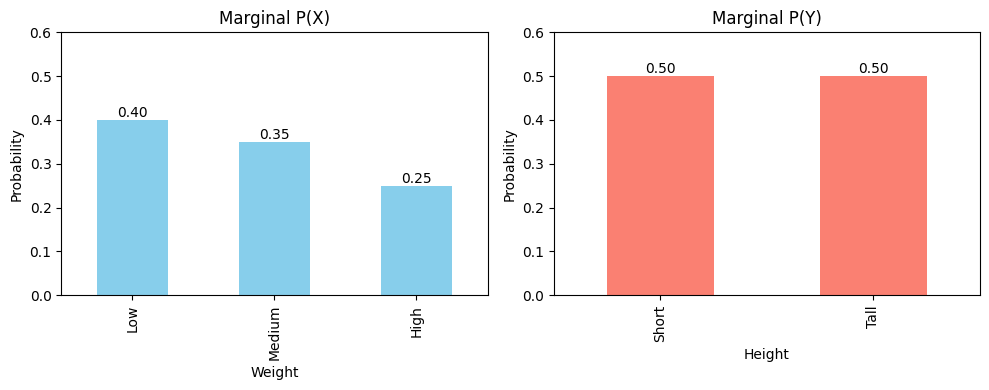

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Contingency table
cont = pd.DataFrame(
    {"Short": [12, 5, 3], "Tall": [4, 9, 7]},
    index=pd.Index(["Low", "Medium", "High"], name="Weight")
)
cont.columns.name = "Height"

# Probabilities
N = cont.values.sum()
P = cont / N                     # joint
Px = P.sum(axis=1)               # marginal X
Py = P.sum(axis=0)               # marginal Y

# Example conditional
cond = P.loc["Low", "Tall"] / Px.loc["Low"]

print("Contingency table:\n", cont, "\n")
print("Joint P(X,Y):\n", P.round(3), "\n")
print("Marginal P(X):\n", Px.round(3), "\n")
print("Marginal P(Y):\n", Py.round(3), "\n")
print(f"P(Tall | Low) = {cond:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
colors = ["skyblue", "salmon"]

for i, (data, title) in enumerate([(Px, "Marginal P(X)"), (Py, "Marginal P(Y)")]):
    data.plot(kind="bar", ax=ax[i], color=colors[i])
    ax[i].set_title(title)
    ax[i].set_ylim(0, 0.6)
    ax[i].set_ylabel("Probability")
    ax[i].bar_label(ax[i].containers[0], fmt="%.2f")

plt.tight_layout()
plt.show()

**Try it:**
- Compute $P(X = \text{Medium})$.
- Compute $P(X = \text{Low}, Y = \text{Tall})$.
- Compute $P(X = \text{Medium} \mid Y = \text{Short})$.

In [ ]:
P_medium = 14 / 40  
P_low_and_tall = 4 / 40
P_medium_given_short = 5 / 20

print(f"P(X='Medium') = {P_medium:.3f}")
print(f"P(X='Low', Y='Tall') = {P_low_and_tall:.3f}")
print(f"P(X='Medium' | Y='Short') = {P_medium_given_short:.3f}")


P(X='Medium') = 0.350
P(X='Low', Y='Tall') = 0.100
P(X='Medium' | Y='Short') = 0.250


# Bayes' Theorem and Bayesian Decision Theory
Starting from the product rule in both directions we obtain
$$
P(X, Y) = P(X \mid Y) P(Y) = P(Y \mid X) P(X).
$$
Rearranging yields Bayes' theorem:
$$
P(Y \mid X) = \frac{P(X \mid Y) P(Y)}{P(X)}, \quad P(X) = \sum_y P(X \mid Y = y) P(Y = y).
$$
Here $P(Y)$ is the **prior**, $P(X \mid Y)$ the **likelihood**, $P(Y \mid X)$ the **posterior**, and $P(X)$ the **evidence**. The **Bayes optimal classifier** selects the class with the largest posterior probability:
$$
f^*(x) = \arg\max_y P(Y = y \mid X = x) = \arg\max_y P(X = x \mid Y = y) P(Y = y),
$$
where the evidence cancels because it is constant with respect to $y$.

<p align="center">
  <img src="Naive_Bayes.png" width="800">
</p>

<p align="center">
  <img src="Naive_Bayes_2.png" width="800">
</p>

# Concrete Example: Bayesian Inference in Medical Testing

Suppose a disease has prevalence $P(\text{Disease}) = 0.01$. A medical test has sensitivity $P(+ \mid \text{Disease}) = 0.95$ and false positive rate $P(+ \mid \neg \text{Disease}) = 0.02$. 

The posterior probability of disease after a positive result is:

$$
P(\text{Disease} \mid +) = \frac{0.95 \times 0.01}{0.95 \times 0.01 + 0.02 \times 0.99} \approx 0.324
$$

This demonstrates how a low prior (prevalence) keeps the posterior modest despite an accurate test.

P(+) = 0.0293
P(Disease | +) = 0.324
P(No Disease | +) = 0.676


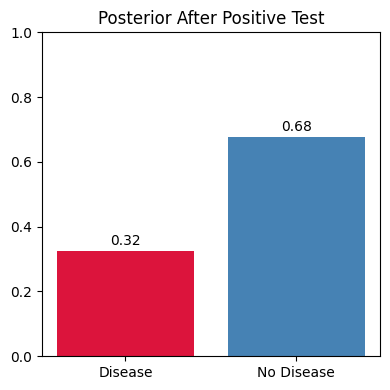

In [13]:
# Given
p_d = 0.01                # prior disease
sens = 0.95               # P(+ | disease)
fp = 0.02                 # P(+ | no disease)

# Compute
p_pos = sens*p_d + fp*(1-p_d)
p_d_pos = sens*p_d / p_pos     # posterior disease
p_nd_pos = 1 - p_d_pos         # posterior no disease

# Print
print(f"P(+) = {p_pos:.4f}")
print(f"P(Disease | +) = {p_d_pos:.3f}")
print(f"P(No Disease | +) = {p_nd_pos:.3f}")

# Plot
vals = [p_d_pos, p_nd_pos]

plt.figure(figsize=(4,4))
plt.bar(["Disease", "No Disease"], vals, color=["crimson", "steelblue"])
plt.title("Posterior After Positive Test")
plt.ylim(0, 1)

for i, v in enumerate(vals):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()

# From Bayes Classifier to Naive Bayes (Curse of Dimensionality & Conditional Independence)
To apply the Bayes classifier we need $P(X_1, \dots, X_n \mid Y)$. For discrete features this requires estimating exponentially many parameters: with $n$ binary features we need $2^n$ joint probabilities per class. This is the **curse of dimensionality** -> data requirements explode with dimensionality.
Naive Bayes assumes **conditional independence** of features given the class:
$$
P(X_1, \dots, X_n \mid Y) = \prod_{i=1}^n P(X_i \mid Y).
$$
Conditional independence is rarely exact yet dramatically reduces parameters and often suffices for accurate argmax decisions.

   n_features  full_joint  naive_bayes
0           3          14            6
1          10        2046           20
2          20     2097150           40
3          30  2147483646           60


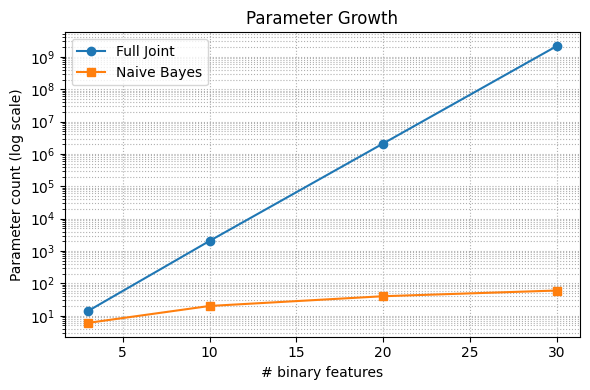

In [6]:
def param_table(n_values=2):
    feats = [3, 10, 20, 30]
    df = pd.DataFrame({
        "n_features": feats,
        "full_joint": [(n_values**f - 1) * 2 for f in feats],
        "naive_bayes": [f * (n_values - 1) * 2 for f in feats]
    })
    return df

df = param_table()
print(df)

plt.figure(figsize=(6, 4))
plt.plot(df.n_features, df.full_joint, "o-", label="Full Joint")
plt.plot(df.n_features, df.naive_bayes, "s-", label="Naive Bayes")
plt.yscale("log")
plt.xlabel("# binary features")
plt.ylabel("Parameter count (log scale)")
plt.title("Parameter Growth")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()



# **Exercise:** For 10 binary features and 3 classes, how many parameters are needed for the full joint model versus Naive Bayes?


## Problem Setup
- **Features**: 10 binary features (X₁, X₂, ..., X₁₀)
- **Classes**: 3 classes (Y ∈ {1, 2, 3})

---

## Full Joint Model

We must specify P(X₁,...,X₁₀, Y).

### Number of possible feature combinations:
- Each feature is binary → 2¹⁰ = 1024 possible X-configurations

### For each X-configuration, 3 class probabilities:
- But each class distribution must sum to 1
- So parameters per configuration: **3 - 1 = 2**

### Total parameters:
```
1024 × 2 = 2048
```

**Full joint parameters = 2048**

---

## Naive Bayes Model

We need:

### 1. Class prior P(Y):
- 3 classes → **2 free parameters**
- C - 1 = 3 - 1 = 2

### 2. Conditional distributions P(Xᵢ=1|Y):
For each class Y:
- 10 binary features
- Each feature gives 1 parameter (because P(X=0|Y) = 1 - P(X=1|Y))

So:
```
10 features × 3 classes = 30
```

### Total Naive Bayes parameters:
```
2 + 30 = 32
```

**Naive Bayes parameters = 32**

---

## Summary Comparison

| Model | Number of Parameters |
|-------|---------------------|
| Full Joint | 2048 |
| Naive Bayes | 32 |

**Reduction factor**: 2048 / 32 = 64×

The Naive Bayes independence assumption dramatically reduces model complexity!

# Naive Bayes Decision Rule – Math Derivation
The Bayes classifier requires $P(Y = y_k \mid X = x) \propto P(X = x \mid Y = y_k) P(Y = y_k)$. With Naive Bayes conditional independence,
$$
P(X = x \mid Y = y_k) = \prod_{i=1}^n P(X_i = x_i \mid Y = y_k)
$$
Therefore the decision rule is
$$
\hat{y}(x) = \arg\max_{y_k} P(Y = y_k) \prod_{i=1}^n P(X_i = x_i \mid Y = y_k)
$$
Working in log-space avoids underflow:
$$
\log P(Y = y_k \mid X = x) = \log P(Y = y_k) + \sum_{i=1}^n \log P(X_i = x_i \mid Y = y_k)
$$

Log-scores:
  Healthy: -3.170
  Sick: -2.343

Posterior probabilities:
  P(Healthy | x) = 0.304
  P(Sick | x) = 0.696

Prediction: Sick


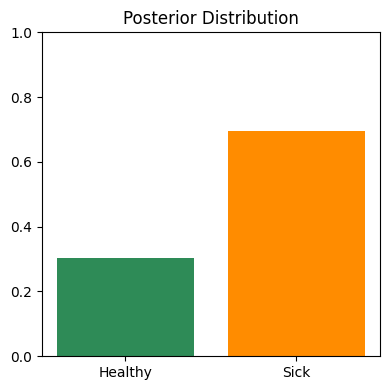

In [14]:
def nb_posterior(x, priors, conds):
    log_scores = {
        c: np.log(priors[c]) +
           sum(np.log(conds[f][v][c]) for f, v in x.items())
        for c in priors
    }

    # stabilize + convert log-scores to probabilities
    max_log = max(log_scores.values())
    probs = {c: np.exp(l - max_log) for c, l in log_scores.items()}
    total = sum(probs.values())
    post = {c: p / total for c, p in probs.items()}
    return post, log_scores


# Example model
priors = {"Healthy": 0.6, "Sick": 0.4}
conds = {
    "Fever": {"Yes": {"Healthy": 0.1, "Sick": 0.8},
              "No": {"Healthy": 0.9, "Sick": 0.2}},
    "Cough": {"Yes": {"Healthy": 0.3, "Sick": 0.7},
              "No": {"Healthy": 0.7, "Sick": 0.3}},
}

x = {"Fever": "Yes", "Cough": "No"}

post, logs = nb_posterior(x, priors, conds)

print("Log-scores:")
for c, l in logs.items():
    print(f"  {c}: {l:.3f}")

print("\nPosterior probabilities:")
for c, p in post.items():
    print(f"  P({c} | x) = {p:.3f}")

print(f"\nPrediction: {max(post, key=post.get)}")

plt.figure(figsize=(4,4))
plt.bar(post.keys(), post.values(), color=["seagreen", "darkorange"])
plt.ylim(0, 1)
plt.title("Posterior Distribution")
plt.tight_layout()
plt.show()

# Categorical Naive Bayes "from scratch" – Play Tennis Example
We will use the classic PlayTennis dataset. Class priors $P(\text{Play})$ and conditionals $P(X_i = v \mid \text{Play})$ are estimated by counting rows. With Laplace smoothing (add-one),
$$
\hat{P}(X_i = v \mid Y = y) = \frac{n_{v,y} + 1}{n_y + K_i},
$$
where $K_i$ is the number of possible values feature $X_i$ can take.


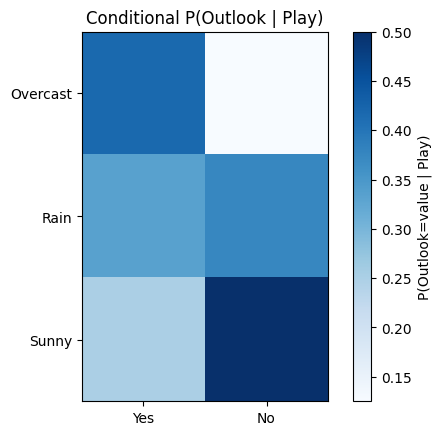

Posterior probabilities:
  P(Yes | x_query) = 0.280
  P(No | x_query) = 0.720

Prediction: No


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Dataset ---
df = pd.DataFrame([
    {"Outlook":"Sunny","Temperature":"Hot","Humidity":"High","Wind":"Weak","Play":"No"},
    {"Outlook":"Sunny","Temperature":"Hot","Humidity":"High","Wind":"Strong","Play":"No"},
    {"Outlook":"Overcast","Temperature":"Hot","Humidity":"High","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Rain","Temperature":"Mild","Humidity":"High","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Rain","Temperature":"Cool","Humidity":"Normal","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Rain","Temperature":"Cool","Humidity":"Normal","Wind":"Strong","Play":"No"},
    {"Outlook":"Overcast","Temperature":"Cool","Humidity":"Normal","Wind":"Strong","Play":"Yes"},
    {"Outlook":"Sunny","Temperature":"Mild","Humidity":"High","Wind":"Weak","Play":"No"},
    {"Outlook":"Sunny","Temperature":"Cool","Humidity":"Normal","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Rain","Temperature":"Mild","Humidity":"Normal","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Sunny","Temperature":"Mild","Humidity":"Normal","Wind":"Strong","Play":"Yes"},
    {"Outlook":"Overcast","Temperature":"Mild","Humidity":"High","Wind":"Strong","Play":"Yes"},
    {"Outlook":"Overcast","Temperature":"Hot","Humidity":"Normal","Wind":"Weak","Play":"Yes"},
    {"Outlook":"Rain","Temperature":"Mild","Humidity":"High","Wind":"Strong","Play":"No"},
])

features = ["Outlook","Temperature","Humidity","Wind"]
target = "Play"

# --- Fit NB ---
def fit_nb(df, features, target):
    class_counts = df[target].value_counts()
    priors = (class_counts / len(df)).to_dict()
    cond = {f:{} for f in features}

    for f in features:
        tab = df.groupby([f, target]).size().unstack(fill_value=0)
        K = len(tab.index)
        for v in tab.index:
            cond[f][v] = {
                c: (tab.loc[v,c] + 1) / (class_counts[c] + K)
                for c in class_counts.index
            }
    return priors, cond

priors, cond = fit_nb(df, features, target)

# --- Show Outlook conditional matrix ---
outlook_df = pd.DataFrame(cond["Outlook"]).T
plt.imshow(outlook_df, cmap="Blues")
plt.xticks(range(len(outlook_df.columns)), outlook_df.columns)
plt.yticks(range(len(outlook_df.index)), outlook_df.index)
plt.colorbar(label="P(Outlook=value | Play)")
plt.title("Conditional P(Outlook | Play)")
plt.show()

# --- Prediction ---
def predict(x, priors, cond):
    scores = {}
    for c,p in priors.items():
        s = p
        for f,v in x.items():
            s *= cond[f][v][c]
        scores[c] = s
    total = sum(scores.values())
    post = {c: s/total for c,s in scores.items()}
    return post

x_query = {"Outlook":"Sunny","Temperature":"Cool","Humidity":"High","Wind":"Strong"}
post = predict(x_query, priors, cond)

print("Posterior probabilities:")
for c,p in post.items():
    print(f"  P({c} | x_query) = {p:.3f}")

print("\nPrediction:", max(post, key=post.get))